In [1]:
import numpy as np
from imports import *


# parameters = {'xtick.labelsize': 6, 'ytick.labelsize': 6,
#           'axes.titlesize': 25, 'axes.labelsize': 5, 'figure.titlesize': 15, 'legend.fontsize': 7}
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#    "font.serif": "cm"
#     })
# plt.rcParams.update(parameters)




ImportError: cannot import name 'golub_kahan' from 'decompositions' (c:\Users\okuno\Dynamic mmgks\Dynamic_Inverse_Problesm_with_Optical_Flow\decompositions.py)

In [2]:
from trips.solvers.MMGKS import *

In [55]:
Tomo = Tomography()

#Specify the shape of the images, the number of images in the sequence and load the image sequence using the gen_seq_function
nx= 64
ny = nx
shape = (nx,ny)
size = nx*ny
t_end = 2

v_max = 3
v_min = 3
padding = 4
data = gen_im_seq(shape,t_end,v_max=v_max,v_min=v_min, padding =padding)
u_traj = data.u_traj
u_inv_traj = data.u_inv_traj
v_primes=data.v_primes
vs=data.vs

# A list of the locations of all pixels
R = np.array(list(np.ndindex(*shape)))


In [30]:
a = np.load('mnist_test_seq.npy')[:,0,:,:][:t_end]

In [90]:

u_traj_ = np.load('mnist_test_seq.npy')[:,33,:,:][0:t_end]#*10
u_traj = [vec(u) for u in u_traj_]
u_inv_traj=u_traj[::-1]
temp = np.zeros((t_end,128,128))
for i in range(2):
    img = u_traj[i].reshape(shape)
    imm = image_to_new_size(img, (128,128))
    temp[i] = imm # imm.flatten()
temp[np.isnan(temp)] = 0
u_traj= list(temp)
shape =(128,128)


In [41]:
u_traj= list(temp)

In [53]:
u_traj

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]

In [50]:
a.reshape(np.array(u_traj).shape)
u_traj=list(a)

In [45]:
u_inv_traj=list(temp[::-1])

In [49]:

u_traj = deepcopy(u_traj)

u_traj_  = deepcopy(u_traj)
Ls = []

for i in range(len(u_traj)-1):

        # Reshape the image array into a 4D array where each element is a 2x2 block
    blocks = u_traj_[i].reshape(nx//scale, scale, ny//scale, scale)

    # Take the mean along the last two axes to get the average of each 2x2 block
    u_traj[i] = np.mean(blocks, axis=(1, 3))


ValueError: could not broadcast input array from shape (32,32) into shape (64,64)

In [52]:
blocks.shape

(32, 2, 32, 2)

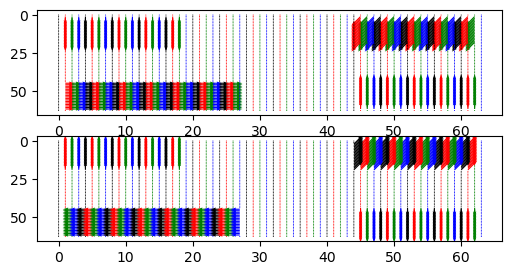

In [32]:
data_inv = [v_primes[i].reshape((nx**2,2)) for i in range(t_end-1)]
data_ = [vs[i].reshape((nx**2,2)) for i in range(t_end-1)]

origin = [np.array(R)[:,1], np.array(R)[:,0]]
#plt.quiver(u_traj[i]_im,v_x.reshape(shape),v_y.reshape(shape), 
# color='g')
fig,ax=plt.subplots(2,t_end-1,figsize=(6*(t_end-1),3*(t_end-1)))
if (t_end <=2):
    ax = ax.reshape((-1,1))
for i in range(len(data_)):
    ax[0,i].quiver(*origin, data_[i][:, 1], -data_[i][:, 0], color=['black', 'red', 'green','blue'],scale=50)
    ax[0,i].invert_yaxis()
    ax[1,i].quiver(*origin, data_inv[i][:, 1], -data_inv[i][:, 0], color=['black', 'red', 'green','blue'],scale=50)
    ax[1,i].invert_yaxis()


In [91]:
n_iter = 20
v_av = 3 #v_max#math.ceil((v_min+v_max)/2)
scale = 1

if (scale ==1): 
    v_trues = None #vs
else: 
    v_trues = None
v_ests_,v_larges_,info_v_b  = solve_opt_flow(u_traj,shape=shape,t_end=t_end,v_trues = v_trues,v_max=v_av, n_iter = n_iter,reduction=True,scale=scale,qnorm=1,proj_dim=3)

nx_= nx//scale; ny_=nx_
# v_ests= v_ests_ * np.sqrt(scale)
# v_larges = v_larges_ * scale
v_ests = []; v_larges =[]
for v in v_ests_:
    v = v.reshape(nx_,nx_,2)
    v = v*(scale)
    v[0,:] = np.zeros(2); v[:,0] = np.zeros(2); v[:,nx_-1] = np.zeros(2); v[nx_-1,:] = np.zeros(2)
    v_ests.append(v)
for v in v_larges_:
    v = v.reshape(nx,ny,2)
    v = v#*(scale)
    v[0,:] = np.zeros(2); v[:,0] = np.zeros(2); v[:,nx-1] = np.zeros(2); v[nx-1,:] = np.zeros(2)
    v_larges.append(v)

# v_ests[v_ests>v_max] = v_max
# v_ests[v_ests<-v_max] = -v_max

v_ests_b = [np.rint(v_ests[(len(v_ests)//(t_end-1))*t:(len(v_ests)//(t_end-1)*(t+1))]) for t in range(t_end-1)]
v_ests_c = [np.rint(v_larges[(len(v_larges)//(t_end-1))*t:(len(v_larges_)//(t_end-1)*(t+1))]) for t in range(t_end-1)]



MemoryError: Unable to allocate 1.98 GiB for an array with shape (532676608,) and data type int32

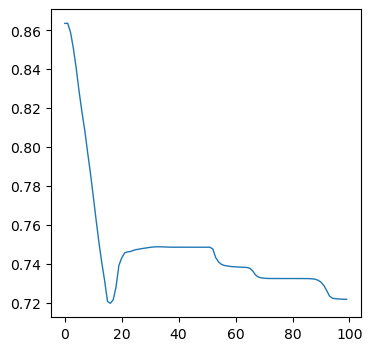

In [16]:
plt.figure(figsize=(4,4))
plt.plot(info_v_b['relError'],'-',lw=1)


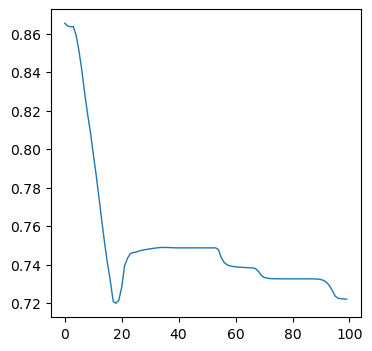

In [29]:
plt.figure(figsize=(4,4))
plt.plot(info_v_b['relError'],'-',lw=1)


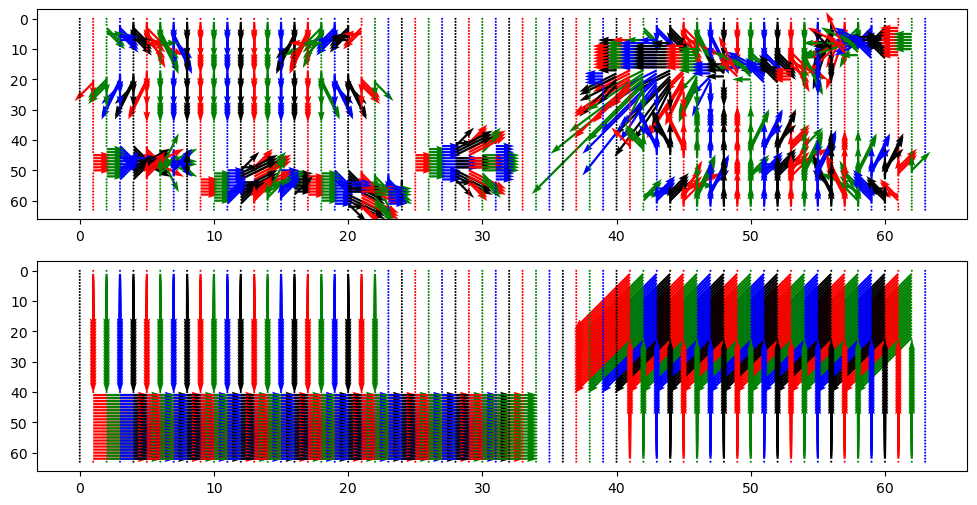

In [21]:
# nx_=64
data_inv = [vs[i].reshape((nx**2,2)) for i in range(t_end-1)]
data_ = [(v_ests_c[i]).reshape((nx**2,2)) for i in range(t_end-1)]

origin = [np.array(R)[:,1], np.array(R)[:,0]]

R_ = np.array(list(np.ndindex(*(nx_,nx_))))
origin_ = [np.array(R_)[:,1], np.array(R_)[:,0]]
#plt.quiver(u_traj[i]_im,v_x.reshape(shape),v_y.reshape(shape), 
# color='g')
fig,ax=plt.subplots(2,t_end-1,figsize=(6*2*(t_end-1),3*2*(t_end-1)))
if (t_end <=2):
    ax = ax.reshape((-1,1))
for i in range(len(data_)):
    ax[0,i].quiver(*origin, data_[i][:, 1], -data_[i][:, 0], color=['black', 'red', 'green','blue'],scale=50)
    ax[0,i].invert_yaxis()
    ax[1,i].invert_yaxis()
    ax[1,i].quiver(*origin, data_inv[i][:, 1], -data_inv[i][:, 0], color=['black', 'red', 'green','blue'],scale=50)


In [44]:
vel_shape

(128, 128, 2)

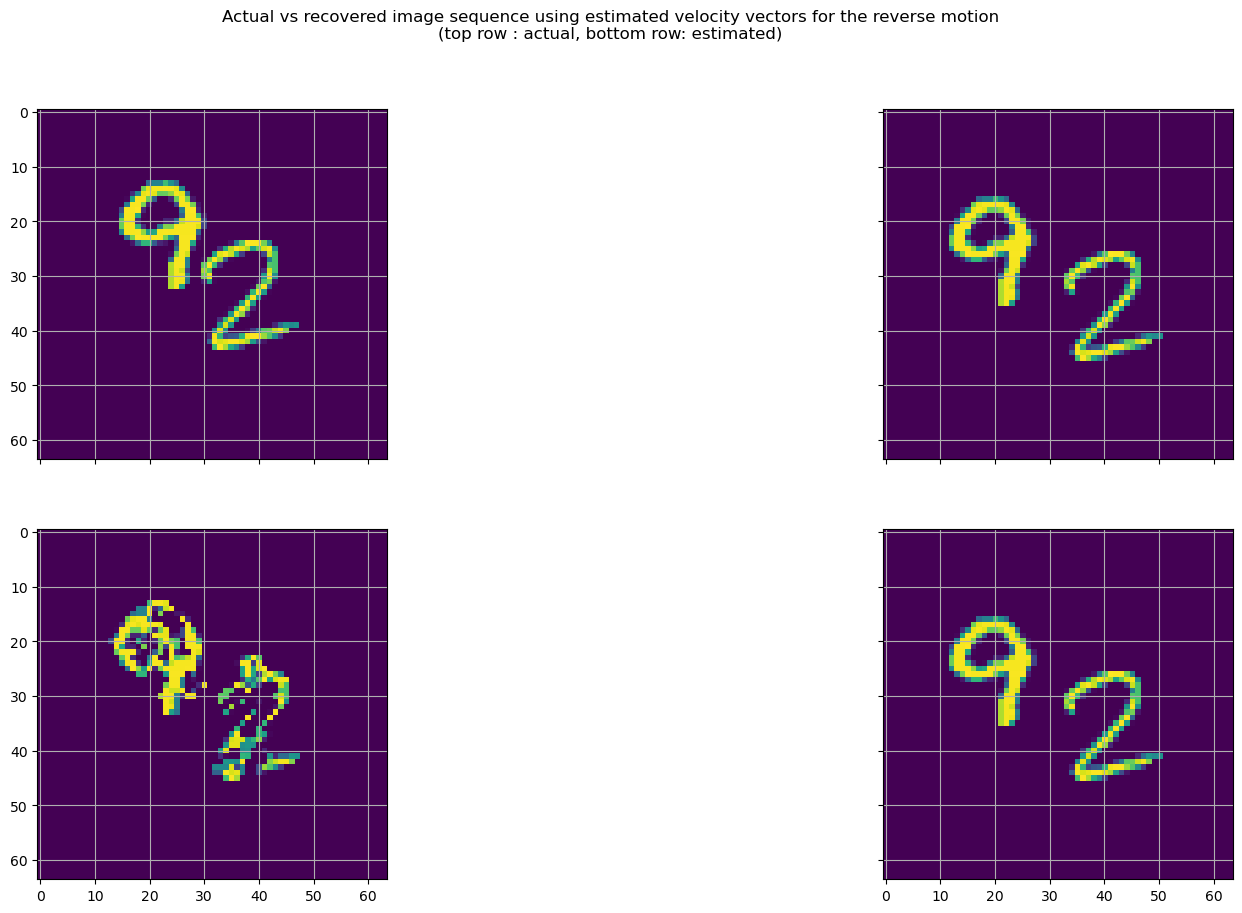

In [84]:
fig,ax=plt.subplots(2,t_end,figsize=(20,10),sharex=True, sharey=True)
vel_shape = shape[0],shape[1],2
#u_traj.reverse()
rec = [u_inv_traj[0].reshape(shape)] + [M(u_inv_traj[i].reshape(shape),(v_ests_c[::-1][i]).reshape(vel_shape)).reshape(shape) for i in range(t_end - 1)]
rec = rec[::-1]
orig = [u_inv_traj[0].reshape(shape)] + [u_inv_traj[i].reshape(shape) for i in range(1,t_end)]
orig = orig[::-1]
for i in range(0,t_end):
    ax[1,i].imshow(rec[i])
    ax[0,i].imshow(orig[i])

    ax[1,i].grid('minor')
    ax[0,i].grid('minor')
    # if (i<t_end-1):
        # print(np.linalg.norm(orig[i]-rec[i])/np.linalg.norm(orig[i]),np.linalg.norm(vs[i]-v_ests_c[::-1][i].reshape(vel_shape))/np.linalg.norm(vs[i]))

fig.suptitle('Actual vs recovered image sequence using estimated velocity vectors for the reverse motion' + '\n' + '(top row : actual, bottom row: estimated)');

0.9323275519311794 2.7450520458569225


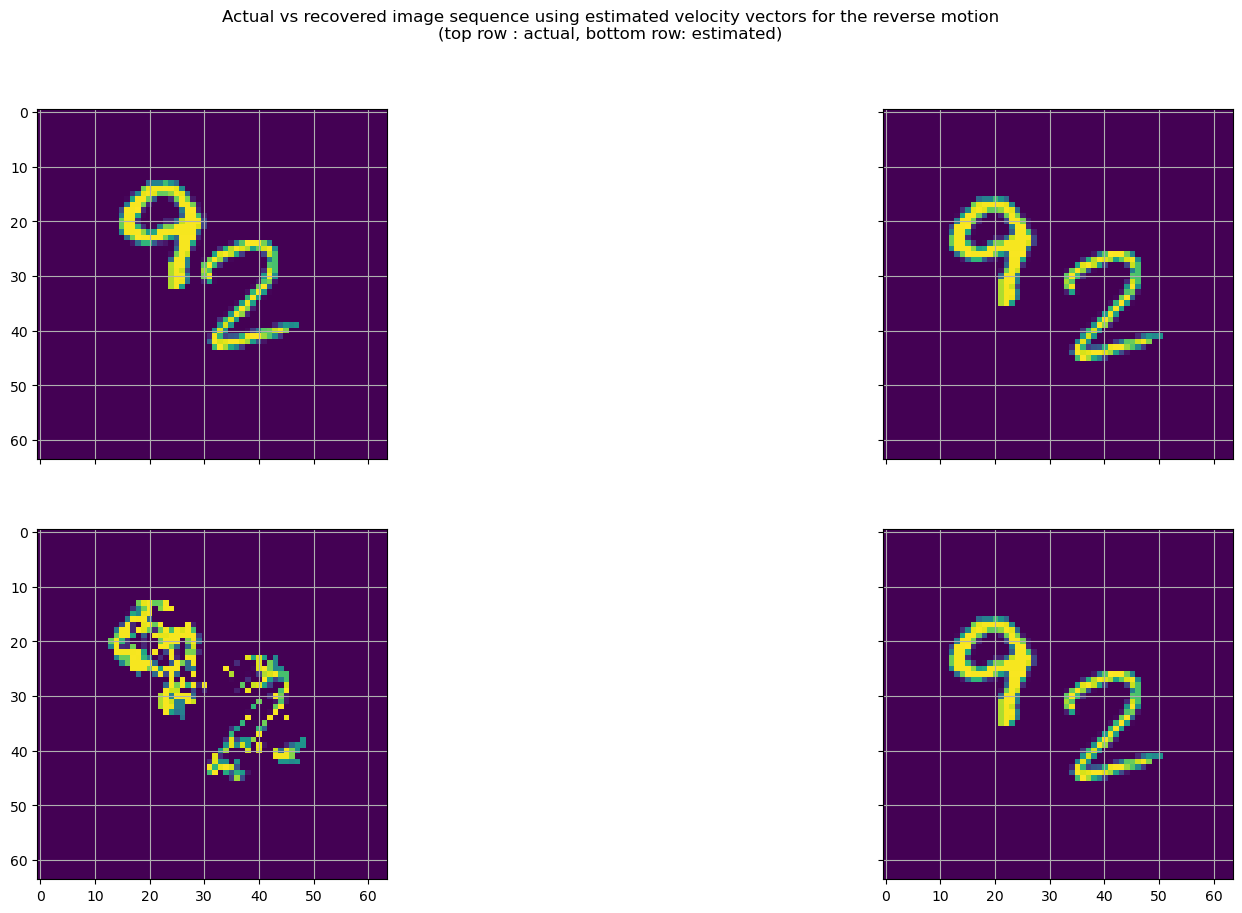

In [89]:
def M(u,v):
    R = np.array(list(np.ndindex(*u.shape)))
    nx = u.shape[0]
    ny = u.shape[1]
    new_ind = (v.reshape(nx*ny,2)+R).astype(int)
    new_ind[new_ind>=nx] = nx-1
    new_ind[new_ind<0] = 0
    return np.array([u[tuple(r)]  for r in new_ind])
fig,ax=plt.subplots(2,t_end,figsize=(20,10),sharex=True, sharey=True)
vel_shape = shape[0],shape[1],2
#u_traj.reverse()
rec = [u_inv_traj[0].reshape(shape)] + [M(u_inv_traj[i].reshape(shape),(v_ests_c[::-1][i]).reshape(vel_shape)).reshape(shape) for i in range(t_end - 1)]
rec = rec[::-1]
orig = [u_inv_traj[0].reshape(shape)] + [u_inv_traj[i].reshape(shape) for i in range(1,t_end)]
orig = orig[::-1]
for i in range(0,t_end):
    ax[1,i].imshow(rec[i])
    ax[0,i].imshow(orig[i])

    ax[1,i].grid('minor')
    ax[0,i].grid('minor')
    if (i<t_end-1):
        print(np.linalg.norm(orig[i]-rec[i])/np.linalg.norm(orig[i]),np.linalg.norm(vs[i]-v_ests_c[::-1][i].reshape(vel_shape))/np.linalg.norm(vs[i]))

fig.suptitle('Actual vs recovered image sequence using estimated velocity vectors for the reverse motion' + '\n' + '(top row : actual, bottom row: estimated)');

In [30]:
n_iter = 50
v_av = v_max#math.ceil((v_min+v_max)/2)
scale = 2
if (scale ==1): 
    v_trues = vs
else: 
    v_trues = None
v_ests_,v_larges_,info_v_b  = solve_opt_flow_new(u_traj,shape=shape,t_end=t_end,v_trues = v_trues,v_max=v_av, n_iter = n_iter,reduction=True,scale=scale)

nx_= nx//scale; ny_=nx_
# v_ests= v_ests_ * np.sqrt(scale)
# v_larges = v_larges_ * scale
v_ests = []; v_larges =[]
for v in v_ests_:
    v = v.reshape(nx_,nx_,2)
    v = v*(scale)
    v[0,:] = np.zeros(2); v[:,0] = np.zeros(2); v[:,nx_-1] = np.zeros(2); v[nx_-1,:] = np.zeros(2)
    v_ests.append(v)
for v in v_larges_:
    v = v.reshape(nx,ny,2)
    v = v#*(scale)
    v[0,:] = np.zeros(2); v[:,0] = np.zeros(2); v[:,nx-1] = np.zeros(2); v[nx-1,:] = np.zeros(2)
    v_larges.append(v)

# v_ests[v_ests>v_max] = v_max
# v_ests[v_ests<-v_max] = -v_max

v_ests_b = [np.rint(v_ests[(len(v_ests)//(t_end-1))*t:(len(v_ests)//(t_end-1)*(t+1))]) for t in range(t_end-1)]
v_ests_c = [np.rint(v_larges[(len(v_larges)//(t_end-1))*t:(len(v_larges_)//(t_end-1)*(t+1))]) for t in range(t_end-1)]

